In [20]:
%matplotlib inline
import math
import numpy as np
import os
import pandas as pd
import pickle

In [21]:
data_dir = '/home/jpfeil/code/pptc-pdx-RNA-Seq-clustering/data'

In [22]:
pth = os.path.join(data_dir, '2019-05-17-pdx-clinical-final-for-paper.txt')

pdx_clinical = pd.read_csv(pth, sep='\t')

# Only consider models that are part of the PPTC
pdx_clinical = pdx_clinical[pdx_clinical['RNA.Part.of.PPTC'] == 'yes']

In [23]:
pth = os.path.join(data_dir, 'pdx-TPM-2019-02-15.tsv')

exp = pd.read_csv(pth, sep='\t', index_col=0)

In [24]:
pdxs = pdx_clinical['Model'].values
print('Started with ', len(pdxs))

pdxs = [x for x in pdxs if x in exp.columns]
print('Ended with ', len(pdxs))

exp = exp.reindex(pdxs, axis=1)

('Started with ', 244)
('Ended with ', 244)


In [25]:
# Map Ensembl IDs to Hugo IDs
pth = os.path.join(data_dir, 'EnsGeneID_Hugo_Observed_Conversions.txt')
ens_to_hugo = {}
with open(pth) as f:
    for line in f:
        h, e = line.strip().split('\t')
        ens_to_hugo[e] = h

In [26]:
exp = exp.reset_index()
exp['hugo'] = exp['index'].map(ens_to_hugo)
exp = exp.drop_duplicates(subset='hugo', keep=False)
exp.drop('index', axis=1, inplace=True)
exp.set_index('hugo', inplace=True)

In [27]:
pth = '/tmp/pptc-pdx-TPM.tsv'
exp = exp[exp.mean(axis=1) > 1]
exp.to_csv(pth, sep='\t')

In [28]:
pth = os.path.join(data_dir, 'pptc-ssgsea-output-c2')

gsea = pd.read_csv(pth, sep='\t')

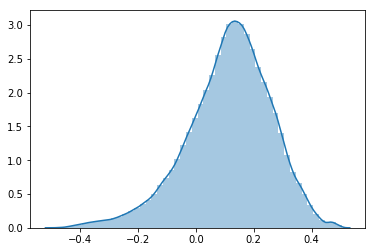

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(gsea.values.flatten())
plt.show()

In [39]:
thresh95 = np.percentile(gsea.values.flatten(), 99)
thresh95

0.40661969589901864

In [41]:
import collections
count = collections.defaultdict(collections.Counter)
hist_count = collections.Counter()
for model in gsea.columns:
    hist = pdx_clinical.loc[pdx_clinical['Model'] == model.replace('.', '-'), 'Histology.Detailed'].item()
    data = gsea[model].sort_values(ascending=False)
    sigs = data[data > thresh95].index.values
    count[hist].update(sigs)
    hist_count[hist] += 1

In [42]:
hist_count

Counter({'ASPS': 2,
         'ATRT': 6,
         'Astrocytoma': 4,
         'BCP-ALL': 37,
         'CNS EFT-CIC': 2,
         'CNS embryonal NOS': 1,
         'CNS germinoma': 1,
         'Clear Cell Sarcoma': 1,
         'Colon Carcinoma': 1,
         'DIPG': 2,
         'ETMR': 3,
         'ETP-ALL': 6,
         'Ependymoblastoma': 1,
         'Ependymoma': 6,
         'Ewing Sarcoma': 9,
         'Extracranial Rhabdoid': 3,
         'Fusion+ RMS': 6,
         'Fusion- RMS': 6,
         'Glioblastoma': 4,
         'Hepatoblastoma': 1,
         'MLL-ALL': 10,
         'Medulloblastoma': 18,
         'Neuroblastoma': 33,
         'Osteosarcoma': 30,
         'Ph+-ALL': 3,
         'Ph-likeALL': 15,
         'Small Cell Carcinoma': 2,
         'T-ALL': 19,
         'Wilms': 12})

In [47]:
for hist in count.keys():
    print hist, hist_count[hist]
    for gs, c in count[model].most_common(30):
        print gs, c
    print 

ETMR 3
RAHMAN_TP53_TARGETS_PHOSPHORYLATED 3
HSIAO_HOUSEKEEPING_GENES 3
MIKHAYLOVA_OXIDATIVE_STRESS_RESPONSE_VIA_VHL_UP 3
BIOCARTA_GLYCOLYSIS_PATHWAY 3
REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SYNTHESIS_BY_CHEMIOSMOTIC_COUPLING_AND_HEAT_PRODUCTION_BY_UNCOUPLING_PROTEINS_ 3
NGO_MALIGNANT_GLIOMA_1P_LOH 3
FU_INTERACT_WITH_ALKBH8 3
CAFFAREL_RESPONSE_TO_THC_24HR_3_UP 3
REACTOME_FORMATION_OF_THE_TERNARY_COMPLEX_AND_SUBSEQUENTLY_THE_43S_COMPLEX 3
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE 3
BIOCARTA_PROTEASOME_PATHWAY 3
REACTOME_PEPTIDE_CHAIN_ELONGATION 3
CASORELLI_APL_SECONDARY_VS_DE_NOVO_DN 3
CHNG_MULTIPLE_MYELOMA_HYPERPLOID_UP 3
RHODES_CANCER_META_SIGNATURE 3
REACTOME_INFLUENZA_LIFE_CYCLE 3
LUI_TARGETS_OF_PAX8_PPARG_FUSION 3
MODY_HIPPOCAMPUS_PRENATAL 3
BILANGES_SERUM_AND_RAPAMYCIN_SENSITIVE_GENES 3
BIOCARTA_EIF_PATHWAY 3
REACTOME_NONSENSE_MEDIATED_DECAY_ENHANCED_BY_THE_EXON_JUNCTION_COMPLEX 3
LUI_THYROID_CANCER_CLUSTER_3 3
REACTOME_TRANSLATION 3
REACTOME_MRNA_SP

In [27]:
gsea

,ALL.102,ALL.105,ALL.106,ALL.107,ALL.108,ALL.11,ALL.115,ALL.116,ALL.117,ALL.118,...,PAKHZT,PAKRSL,PAKSWW,PAKVKK,PALJDL,PALKTY,PALLSD,PALNTB,PALTWS,PAMDRM
PROLINE BIOSYNTHESIS I%HUMANCYC%PROSYN-PWY,0.134157,0.114358,0.068575,0.123149,0.092070,0.095611,0.102738,0.277664,0.117345,0.115203,...,0.081846,0.173530,0.157612,0.212049,0.164653,0.180844,0.215513,0.166679,0.280493,0.180221
MOLYBDENUM COFACTOR BIOSYNTHESIS%HUMANCYC%PWY-6823,-0.062872,-0.080233,-0.115850,-0.109437,-0.111745,-0.072975,-0.077549,-0.009806,-0.094949,0.014671,...,-0.057769,-0.033299,0.003777,-0.035188,-0.108206,-0.013560,-0.044968,-0.085124,0.012594,-0.062166
GLYCEROL DEGRADATION I%HUMANCYC%PWY-4261,-0.099468,-0.042050,-0.090263,0.038521,-0.011530,-0.028971,0.001251,-0.102450,-0.052372,-0.042369,...,0.000931,0.037224,-0.073328,-0.030421,-0.082169,-0.067504,-0.068433,0.050343,0.001383,-0.080370
OXIDATIVE ETHANOL DEGRADATION III%HUMANCYC%PWY66-161,0.098324,-0.009424,0.014577,-0.044924,0.005981,-0.020541,0.044901,-0.003288,0.005442,-0.035060,...,-0.012565,-0.014755,0.016616,-0.063858,-0.072318,-0.008260,-0.047444,-0.032139,-0.018857,-0.054211
TETRAPYRROLE BIOSYNTHESIS II%HUMANCYC%PWY-5189,0.222344,0.152664,0.146148,0.199806,0.173610,0.163382,0.191090,0.259965,0.156468,0.186345,...,0.200547,0.208134,0.230008,0.240180,0.201076,0.226708,0.236350,0.201752,0.197309,0.190167
ASPARAGINE DEGRADATION I%HUMANCYC%ASPARAGINE-DEG1-PWY,-0.308559,-0.441124,-0.218703,-0.425908,-0.436744,-0.001988,-0.440951,-0.259625,-0.268617,-0.292305,...,-0.415303,-0.264986,-0.423429,-0.415245,-0.438300,-0.333228,-0.288617,-0.423602,-0.423718,-0.429597
TETRAHYDROBIOPTERIN BIOSYNTHESIS I%HUMANCYC%PWY-5663,0.038374,-0.003057,0.026337,0.019174,-0.020539,-0.053861,-0.006350,-0.027293,-0.013863,-0.039443,...,0.008112,0.021040,0.057127,0.046905,0.072200,0.071227,0.101608,-0.006460,0.058913,0.051953
UREA CYCLE%HUMANCYC%PWY-4984,-0.127667,-0.174896,-0.214840,-0.160994,-0.192987,-0.164967,-0.131398,-0.121397,-0.169538,-0.195344,...,-0.149999,-0.131778,-0.169424,-0.164227,-0.204633,-0.183129,-0.163271,-0.148376,0.042636,-0.169107
KETOGENESIS%HUMANCYC%REACT_1464.NULL,0.283592,0.289173,0.258175,0.303124,0.277823,0.261464,0.269140,0.294667,0.272501,0.271641,...,0.303702,0.315717,0.287281,0.327110,0.270427,0.324195,0.314597,0.314010,0.313652,0.300484
CDP-DIACYLGLYCEROL BIOSYNTHESIS I%HUMANCYC%PWY-5667,0.091308,0.058910,0.105543,0.092492,0.126797,0.084675,0.066407,0.118825,0.094180,0.097028,...,0.108967,0.069202,0.058969,0.097258,0.048875,0.101892,0.092364,0.063720,0.079178,0.089983


In [30]:
print '\n'.join(pdx_clinical.columns)

DNA.Part.of.PPTC
RNA.Part.of.PPTC
Model.Part.of.PPTC
Consent.to.Share.Data.
Have.snp.file
snp.array.filename
snp.array.sample.ID
Have.maf
WES.human.bam.filename
Human.wes.md5
WES.mouse.bam.filename
RNA.human.bam.filename
Human.rna.md5
RNA.mouse.bam.filename
Have.fpkm.file
FPKM.filename
PDX.WES.filename
PDX.wes.md5
PDX.RNA.filename
PDX.rna.md5
Tumor_Sample_Barcode
TSB.minus
TSB.RNA
Model.Type
PersonID
Model
Diagnosis...not.necessarily.accurate.
CaseID
SampleName
TARGET.ID
Histology
Histology.Detailed
Histology.oncotree
Histology.pedcbio
Histology.Broad
Histology.Priors
Histology.Oncoprints
Histology.Oncoprints2
PI
FilePrefix
DNA.ID
RNA.ID
Matching.Normal.DNA
Exome_Seq.Done
GEP.Done
RNASeq.Done
RNASeq_bam.Avail
RNASeq_fpkm.Avail
WES_bam.Avail
Panel
Sex
Phase
Phase2
Phase.Oncoprints
Age.months
Age.units..will.remove.column.once.all.ages.are.in.months.
Age
Reported_Ethnicity
Inferred_Ethnicity
Site.of.Initial.Tumor
Site.of.Specimen
Histopathology
New.Histopathology
Stage.of.Disease
Risk.Gr